In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./ufc.csv")
df = pd.DataFrame(df)
df

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,"Denver, Colorado, USA",Orlando Wiet,Sean Daugherty,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Open Weight,SUB Guillotine Choke,1.0,0:20,UFC 2,11-Mar-94,Patrick Smith
7413,"Denver, Colorado, USA",Frank Hamaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scott Morris
7414,"Denver, Colorado, USA",Johnny Rhodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7415,"Denver, Colorado, USA",Patrick Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_new = df.dropna()

def time_converter(time):
    splitted = time.split(":")

    first = int(splitted[0])
    second = int(splitted[1])

    res = first*60 + second

    return res

def round_converter(rnd):
    return (int(rnd) - 1) * 300

df_new["Time in seconds"] = df_new["Time"].apply(time_converter)

df_new["Time in seconds"] += df_new["Round"].apply(round_converter)

df_new


/var/folders/lh/rd5kzgf52pv46_540yq0yf380000gn/T/ipykernel_55351/4255584140.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Time in seconds"] = df_new["Time"].apply(time_converter)
/var/folders/lh/rd5kzgf52pv46_540yq0yf380000gn/T/ipykernel_55351/4255584140.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Time in seconds"] += df_new["Round"].apply(round_converter)


,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner,Time in seconds
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan,64
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner,169
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo,900
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady,703
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,"Denver, Colorado, USA",Patrick Smith,Robert Lucarelli,0.0,0.0,8.0,2.0,0.0,1.0,0.0,1.0,Open Weight,KO/TKO,1.0,2:50,UFC 2,11-Mar-94,Remco Pardoel,170
7409,"Denver, Colorado, USA",Royce Gracie,Thaddeus Luster,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,Open Weight,SUB Keylock,1.0,4:52,UFC 2,11-Mar-94,Orlando Wiet,292
7410,"Denver, Colorado, USA",Jason DeLucia,David Levicki,0.0,0.0,11.0,4.0,1.0,0.0,0.0,0.0,Open Weight,KO/TKO Punches,1.0,12:13,UFC 2,11-Mar-94,Frank Hamaker,733
7411,"Denver, Colorado, USA",Remco Pardoel,Ray Wizard,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Open Weight,SUB Guillotine Choke,1.0,0:58,UFC 2,11-Mar-94,Johnny Rhodes,58


In [5]:
total_kd = (df["Fighter_1_KD"] + df["Fighter_2_KD"]).mean()
total_str= (df["Fighter_1_STR"] + df["Fighter_2_STR"]).mean()
total_td= (df["Fighter_1_TD"] + df["Fighter_2_TD"]).mean()
total_sub= (df["Fighter_1_SUB"] + df["Fighter_1_SUB"]).mean()

print("Average knockdowns per fight: ", total_kd)
print("Average significant strikes per fight: ", total_str)
print("Average takedown attemps per fight: ", total_td)
print("Average submissions attemps per fight: ", total_sub)

Average knockdowns per fight:  0.43059490084985835
Average significant strikes per fight:  71.67637933360312
Average takedown attemps per fight:  2.1181707810602997
Average submissions attemps per fight:  1.0640766221502767


In [6]:
event_names = df_new["Event Name"].unique() # useless
methods = df_new["Method"].unique()

methods

array(['KO/TKO Punch', 'KO/TKO Punches', 'U-DEC', 'SUB Kimura',
       'SUB Rear Naked Choke', 'KO/TKO Slam', 'S-DEC', 'SUB Neck Crank',
       'SUB Guillotine Choke', 'Overturned', 'KO/TKO Elbows',
       'KO/TKO Kick', 'SUB Armbar', 'M-DEC', 'KO/TKO Knees', 'CNC',
       'SUB Arm Triangle', 'KO/TKO Kicks', 'KO/TKO Knee', 'KO/TKO', 'DQ',
       'SUB Anaconda Choke', 'SUB Ezekiel Choke', 'SUB Triangle Choke',
       'SUB Twister', 'SUB Triangle Armbar', "SUB D'Arce Choke",
       'KO/TKO Spinning Back Elbow', 'Overturned Guillotine Choke',
       'KO/TKO Elbow', 'SUB Other - Lock', 'SUB Kneebar',
       'SUB Inverted Triangle', 'KO/TKO Flying Knee',
       'KO/TKO Spinning Back Kick', 'SUB Von Flue Choke',
       'KO/TKO Spinning Back Fist', 'SUB Keylock', 'SUB Scarf Hold',
       'SUB Straight Armbar', 'SUB Heel Hook', 'Overturned Punches',
       'SUB Ankle Lock', 'SUB Forearm Choke', 'SUB Injury',
       'Overturned Punch', 'Overturned Rear Naked Choke',
       'Overturned Knee', 'O

Тут можна теж багато різного побачити. Я б казав забрати все що не містить у собі KO/TKO, DEC, SUB, CNC (зупинка від команди типу білий рушник кинули). Overtuned, Other, DQ - не пригодяться нам (перше вроді про неправильне рішення суддів напевно, а про друге не знаю)

In [7]:
def methods_destroyer(df: pd.DataFrame):
    filtered = df[~df_new["Method"].str.contains("Overturned|DQ|Other")]
    return filtered


df_fil = methods_destroyer(df_new)

df_fil["Method"].unique()

array(['KO/TKO Punch', 'KO/TKO Punches', 'U-DEC', 'SUB Kimura',
       'SUB Rear Naked Choke', 'KO/TKO Slam', 'S-DEC', 'SUB Neck Crank',
       'SUB Guillotine Choke', 'KO/TKO Elbows', 'KO/TKO Kick',
       'SUB Armbar', 'M-DEC', 'KO/TKO Knees', 'CNC', 'SUB Arm Triangle',
       'KO/TKO Kicks', 'KO/TKO Knee', 'KO/TKO', 'SUB Anaconda Choke',
       'SUB Ezekiel Choke', 'SUB Triangle Choke', 'SUB Twister',
       'SUB Triangle Armbar', "SUB D'Arce Choke",
       'KO/TKO Spinning Back Elbow', 'KO/TKO Elbow', 'SUB Kneebar',
       'SUB Inverted Triangle', 'KO/TKO Flying Knee',
       'KO/TKO Spinning Back Kick', 'SUB Von Flue Choke',
       'KO/TKO Spinning Back Fist', 'SUB Keylock', 'SUB Scarf Hold',
       'SUB Straight Armbar', 'SUB Heel Hook', 'SUB Ankle Lock',
       'SUB Forearm Choke', 'SUB Injury', 'SUB Peruvian Necktie',
       'SUB Schultz Front Headlock', 'SUB Bulldog Choke',
       'SUB Suloev Stretch', 'SUB Omoplata', 'SUB Calf Slicer',
       'SUB North-South Choke', 'SUB Pac

In [8]:
df_new["Weight_Class"].unique()

array(['Lightweight', 'Bantamweight', 'Welterweight', 'Middleweight',
       "Women's Bantamweight", 'Light Heavyweight', "Women's Flyweight",
       "Women's Strawweight", 'Featherweight', 'Heavyweight', 'Flyweight',
       'Catch Weight', "Women's Featherweight", 'Super Heavyweight',
       'Open Weight'], dtype=object)

Open weight та catch weight - можна забрати бо це не стандартна вага

In [9]:
def weight_destroyer(df: pd.DataFrame):
    filtered = df[~df_new["Weight_Class"].str.contains("Open|Catch")]
    return filtered

df_fil = weight_destroyer(df_fil)

df_fil["Weight_Class"].unique()

/var/folders/lh/rd5kzgf52pv46_540yq0yf380000gn/T/ipykernel_55351/2663720929.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = df[~df_new["Weight_Class"].str.contains("Open|Catch")]


array(['Lightweight', 'Bantamweight', 'Welterweight', 'Middleweight',
       "Women's Bantamweight", 'Light Heavyweight', "Women's Flyweight",
       "Women's Strawweight", 'Featherweight', 'Heavyweight', 'Flyweight',
       "Women's Featherweight", 'Super Heavyweight'], dtype=object)

Можна викинути колонки про Date і Event

In [10]:
def de_remover(df: pd.DataFrame):
    if df.columns.str.contains("Date|Event Name").any():
        return df.drop(["Date", "Event Name"], axis=1)


df_fil = de_remover(df_fil)


In [11]:
def replace_method(method: str):
    if "DEC" in method:
        return "DEC"
    elif "SUB" in method:
        return "SUB"
    elif "KO" in method:
        return "KO"
    elif "CNC" in method:
        return "KO"

df_fil["Method"] = df_fil["Method"].apply(replace_method)


df_fil["Method"].unique()


array(['KO', 'DEC', 'SUB'], dtype=object)

In [12]:
fighters = list(set(df_fil["Fighter 1"].unique()).union(set(df_fil["Fighter 2"].unique())))
fighters_df = pd.DataFrame({"Fighter_name": [],
                            "Average_significant_strikes": [],
                            "Average_takedowns": [],
                            "Average_submission_attempts": [],
                            "Wins": [],
                            "Loss": []})


for ele in fighters:
    win_df = df_fil.loc[df_fil["Fighter 1"] == ele]
    lose_df = df_fil.loc[df_fil["Fighter 2"] == ele]

    wins, losses = int(len(win_df.index)), int(len(lose_df.index))

    amount_of_mentions = wins + losses

    avg_strk = round((win_df["Fighter_1_STR"].sum() + lose_df["Fighter_2_STR"].sum())/amount_of_mentions, 2)
    avg_tkd = round((win_df["Fighter_1_TD"].sum() + lose_df["Fighter_2_TD"].sum())/amount_of_mentions, 2)
    avg_subs = round((win_df["Fighter_1_SUB"].sum() + lose_df["Fighter_2_SUB"].sum())/amount_of_mentions, 2)
    koes = win_df["Fighter_1_KD"].sum() + lose_df["Fighter_2_KD"].sum()

    data = {
        "Fighter_name": ele,
        "Average_significant_strikes": [avg_strk],
        "Average_takedowns": [avg_tkd],
        "Average_submission_attempts": [avg_subs],
        "Wins": [wins],
        "Loss": [losses],
        "Ko": [koes]
    }

    fighters_df = pd.concat([fighters_df, pd.DataFrame(data)], ignore_index = True)


fighters_df["win_rate"] = fighters_df["Wins"]/(fighters_df["Wins"] + fighters_df["Loss"])
fighters_df["activity"] = fighters_df["Average_significant_strikes"] + 5*fighters_df["Average_takedowns"] + 5*fighters_df["Average_submission_attempts"]
fighters_df

,Fighter_name,Average_significant_strikes,Average_takedowns,Average_submission_attempts,Wins,Loss,Ko,win_rate,activity
0,Eiji Mitsuoka,18.50,0.50,0.50,0.0,2.0,1.0,0.000000,23.50
1,Andrew Sanchez,55.70,2.20,0.00,5.0,5.0,3.0,0.500000,66.70
2,Andre Gusmao,25.50,0.00,0.00,0.0,2.0,0.0,0.000000,25.50
3,Sara McMann,19.92,2.08,0.31,7.0,6.0,1.0,0.538462,31.87
4,Jonathan Meunier,45.00,0.50,0.00,1.0,1.0,0.0,0.500000,47.50
...,...,...,...,...,...,...,...,...,...
2343,Myles Jury,27.25,1.33,0.17,8.0,4.0,3.0,0.666667,34.75
2344,Omari Akhmedov,35.67,2.07,0.20,9.0,6.0,2.0,0.600000,47.02
2345,Sedriques Dumas,23.67,0.33,0.00,2.0,1.0,0.0,0.666667,25.32
2346,Nate Maness,17.40,0.40,0.00,3.0,2.0,1.0,0.600000,19.40


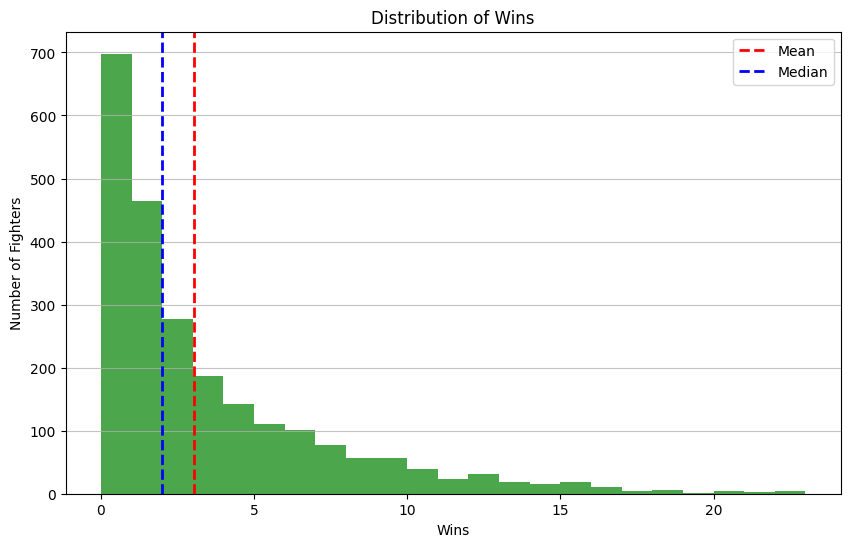

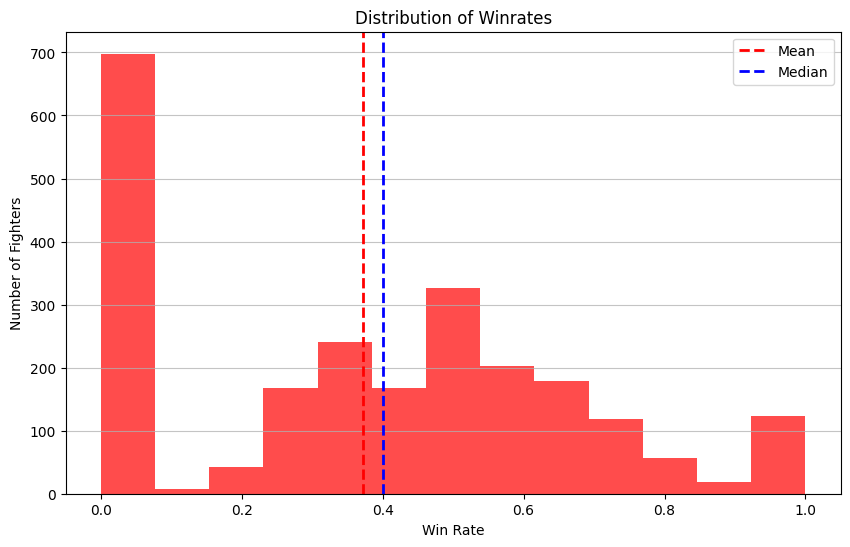

In [17]:
mean_wins = fighters_df["Wins"].mean()
median_wins = fighters_df["Wins"].median()

plt.figure(figsize=(10, 6))
plt.hist(fighters_df["Wins"], bins=int(fighters_df["Wins"].max()), color='green', alpha=0.7)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Number of Fighters')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_wins, color='red', linestyle='dashed',
            linewidth=2, label='Mean')
plt.axvline(median_wins, color='blue', linestyle='dashed',
            linewidth=2, label='Median')
plt.legend()

plt.show()

mean_wr = fighters_df["win_rate"].mean()
median_wr = fighters_df["win_rate"].median()
plt.figure(figsize=(10, 6))
plt.hist(fighters_df["win_rate"], bins='auto', color='red', alpha=0.7)
plt.title('Distribution of Winrates')
plt.xlabel('Win Rate')
plt.ylabel('Number of Fighters')
plt.grid(axis='y', alpha=0.75)
plt.axvline(mean_wr, color='red', linestyle='dashed',
            linewidth=2, label='Mean')
plt.axvline(median_wr, color='blue', linestyle='dashed',
            linewidth=2, label='Median')
plt.legend()
plt.show()

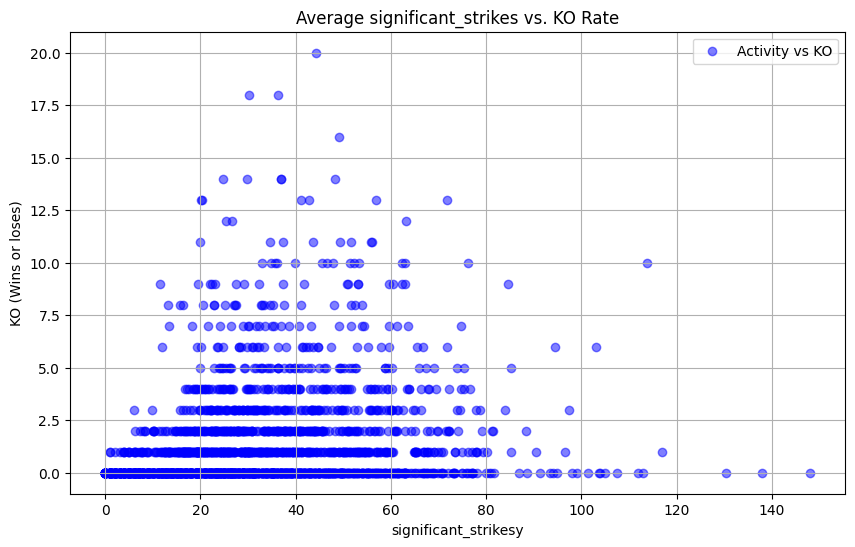

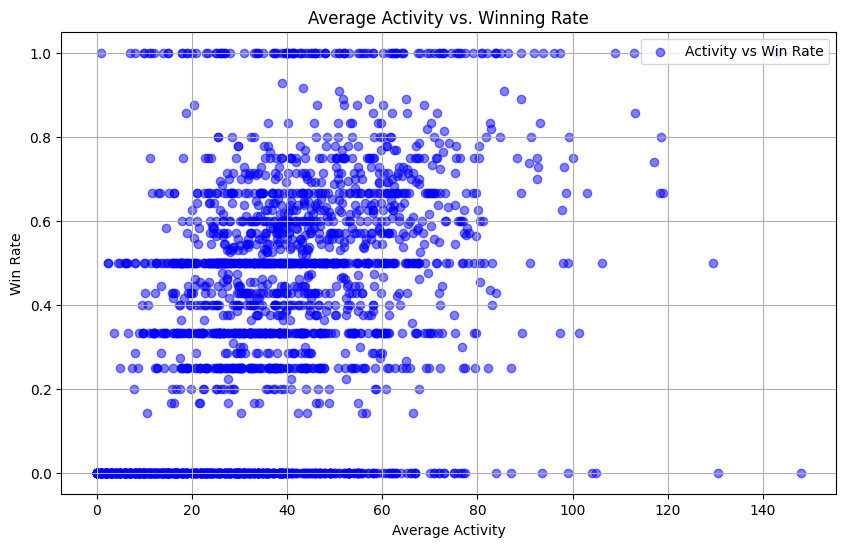

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(fighters_df["Average_significant_strikes"], fighters_df["Ko"], color='blue', alpha=0.5, label='Activity vs KO')
plt.title('Average significant_strikes vs. KO Rate')
plt.xlabel('significant_strikesy')
plt.ylabel('KO (Wins or loses)')
plt.legend()
plt.grid(True)
plt.show()

# Improved Scatter plot for Average Activity vs. Win Rate
plt.figure(figsize=(10, 6))
plt.scatter(fighters_df["activity"], fighters_df["win_rate"], color='blue', alpha=0.5, label='Activity vs Win Rate')
plt.title('Average Activity vs. Winning Rate')
plt.xlabel('Average Activity')
plt.ylabel('Win Rate')
plt.legend()
plt.grid(True)
plt.show()

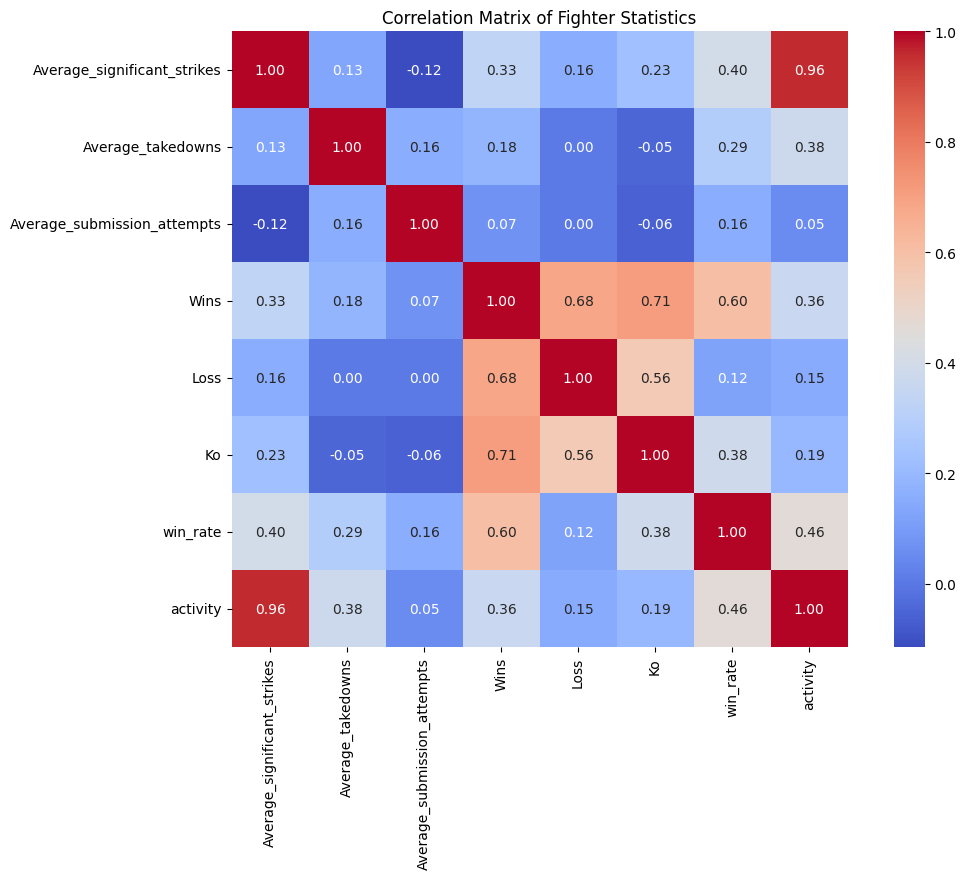

In [15]:
cor_df = fighters_df.drop(["Fighter_name"], axis=1)
correlation_matrix = cor_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Matrix of Fighter Statistics')
plt.show()


In [94]:
fighters_df.loc[fighters_df["Average_takedowns"] == fighters_df["Average_takedowns"].max()]

,Fighter_name,Average_significant_strikes,Average_takedowns,Average_submission_attempts,Wins,Loss
1955,Myktybek Orolbai,8.0,7.0,1.0,1.0,0.0


In [95]:
# fighters_df = fighters_df.drop(["Fighter_name"], axis = 1)

model = smf.ols(f"Wins ~ {' + '.join(fighters_df.drop(['Wins', 'Loss'], axis=1).columns.to_list())}", data=fighters_df).fit()

#print(model.summary())



# OLS

In [96]:
df_fil.columns

Index(['Location', 'Fighter 1', 'Fighter 2', 'Fighter_1_KD', 'Fighter_2_KD',
       'Fighter_1_STR', 'Fighter_2_STR', 'Fighter_1_TD', 'Fighter_2_TD',
       'Fighter_1_SUB', 'Fighter_2_SUB', 'Weight_Class', 'Method', 'Round',
       'Time', 'Winner', 'Time in seconds'],
      dtype='object')

In [97]:
def second_to_minutes(time):
  min = math.floor(time/60)
  sec = str(time - min * 60).replace(".","0")[:2]
  return str(min) + ":" + str(sec) if len(sec) == 2 else str(min) + ":0" + str(sec)


print(second_to_minutes(df_fil["Time in seconds"].mean()))
print("__________")
weights = ["Women's Strawweight","Women's Flyweight", "Women's Bantamweight","Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight", "Middleweight", "Light Heavyweight", "Heavyweight"]
for each in weights:
  print(f'Avetage time for {each} - {second_to_minutes(df_fil[df_fil["Weight_Class"] == each]["Time in seconds"].mean())}')
print("__________")

df_fil


10:35
__________
Avetage time for Women's Strawweight - 12:33
Avetage time for Women's Flyweight - 12:28
Avetage time for Women's Bantamweight - 12:20
Avetage time for Flyweight - 11:32
Avetage time for Bantamweight - 11:40
Avetage time for Featherweight - 11:29
Avetage time for Lightweight - 10:31
Avetage time for Welterweight - 10:43
Avetage time for Middleweight - 9:54
Avetage time for Light Heavyweight - 9:29
Avetage time for Heavyweight - 8:39
__________


,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Winner,Time in seconds
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO,1.0,1:04,Arman Tsarukyan,64
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO,1.0,2:49,Jalin Turner,169
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,DEC,3.0,5:00,Deiveson Figueiredo,900
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB,3.0,1:43,Sean Brady,703
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,DEC,3.0,5:00,Joaquim Silva,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,"Dothan, Alabama, USA",Vitor Belfort,Nick Sanzo,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,Lightweight,SUB,1.0,0:39,Jerry Bohlander,39
7310,"Dothan, Alabama, USA",Jerry Bohlander,Tra Telligman,1.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,Heavyweight,KO,1.0,1:17,Vitor Belfort,77
7311,"Dothan, Alabama, USA",Vitor Belfort,Jim Mullen,0.0,0.0,30.0,3.0,2.0,0.0,1.0,0.0,Heavyweight,KO,1.0,8:02,Scott Ferrozzo,482
7312,"Dothan, Alabama, USA",Scott Ferrozzo,Wallid Ismail,0.0,0.0,20.0,1.0,1.0,1.0,0.0,0.0,Lightweight,DEC,2.0,3:00,Yoshiki Takahashi,480


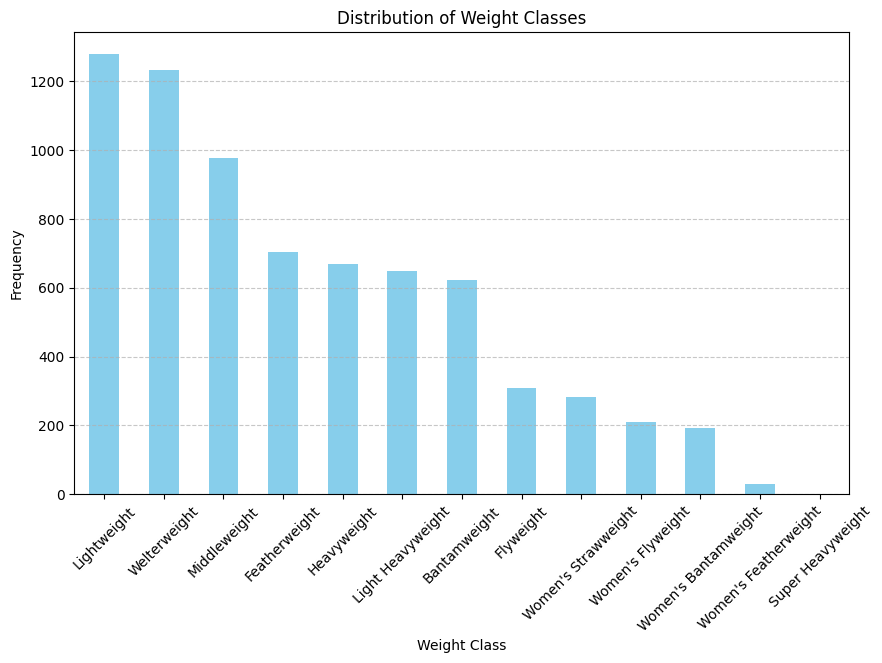

In [134]:
weight_class_counts = df_fil['Weight_Class'].value_counts()

plt.figure(figsize=(10, 6))
weight_class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [98]:
df_fil["Weight_Class"].unique()

array(['Lightweight', 'Bantamweight', 'Welterweight', 'Middleweight',
       "Women's Bantamweight", 'Light Heavyweight', "Women's Flyweight",
       "Women's Strawweight", 'Featherweight', 'Heavyweight', 'Flyweight',
       "Women's Featherweight", 'Super Heavyweight'], dtype=object)

In [99]:
df_fil["Gender"] = np.where(df_fil["Weight_Class"].str.contains("Women"), 1, 0)

In [100]:
df_man = df_fil.loc[df_fil["Gender"] == 0].drop(["Gender"], axis=1)
df_woman = df_fil.loc[df_fil["Gender"] != 0].drop(["Gender"], axis=1)

In [101]:
def weight_breaker(df: pd.DataFrame):
    for ele in df["Weight_Class"].unique():
        df[ele] = 1

    for ele in df["Weight_Class"].unique():
        df[ele] = np.where(df["Weight_Class"].str.contains(ele), 1, 0)

    # if df.columns.str.contains("Weight_Class"):
    #     df.drop(["Weight_Class"], axis=1)

    return df

df_man_clear = weight_breaker(df_man)
df_woman_clear = weight_breaker(df_woman)


In [18]:
df_man_fixed = df_man_clear.loc[(df_man_clear["Winner"] == df_man_clear["Fighter 1"]) | (df_man_clear["Winner"] == df_man_clear["Fighter 2"])].reset_index()
df_woman_fixed = df_woman_clear.loc[(df_woman_clear["Winner"] == df_woman_clear["Fighter 1"]) | (df_woman_clear["Winner"] == df_woman_clear["Fighter 2"])].reset_index()

In [102]:
def history_winrate(df: pd.DataFrame):
    nrows = df.size//df.columns.size
    winrate = []

    for i in range(nrows):
        current = df.iloc[i,]

        for j in range(1,3):
            current_fighter = current[f"Fighter {j}"]

            stats = pd.concat([df.iloc[i+1:,].loc[df[f"Fighter {k}"] == current_fighter] for k in range(1,3)])

            if stats.empty:
                current_winrate = 0

            else:
                wins = 0 if stats.loc[stats["Winner"] == current_fighter].empty else (stats["Winner"].value_counts())[current_fighter]
                all_fights = len(stats.index)

                current_winrate = 1 if not (wins - all_fights) else round(wins/all_fights, 2)

            winrate += [current_winrate]

    winrate = np.array(winrate)
    winrate2d = winrate.reshape(nrows, 2)

    winrate_df = pd.DataFrame({"Current winrate F1": winrate2d[:, 0], "Current winrate F2": winrate2d[:, 1]})

    res = pd.concat([df, winrate_df], axis=1, ignore_index=True)
    res.columns = df.columns.to_list() + winrate_df.columns.to_list()

    return res.drop(["index"], axis=1)


winrates_df = history_winrate(df_man_fixed)


In [103]:
names = [ele.replace(" ", "_") for ele in winrates_df.columns.to_list()]

winrates_df.columns = names
df_man_fixed

,index,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,...,Time in seconds,Lightweight,Bantamweight,Welterweight,Middleweight,Light Heavyweight,Featherweight,Heavyweight,Flyweight,Super Heavyweight
0,0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,...,364,1,0,0,0,0,0,0,0,0
1,1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,...,469,1,0,0,0,0,0,0,0,0
2,2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,...,1200,0,1,0,0,0,0,0,0,0
3,3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,...,1003,0,0,1,0,0,0,0,0,0
4,4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,...,1200,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,7263,"Mobile, Alabama, USA",Dan Henderson,Carlos Newton,0.0,2.0,28.0,20.0,3.0,2.0,...,780,0,0,0,1,0,0,0,0,0
6401,7264,"Mobile, Alabama, USA",David Abbott,Hugo Duarte,0.0,0.0,11.0,0.0,0.0,1.0,...,343,0,0,0,0,0,0,1,0,0
6402,7265,"Mobile, Alabama, USA",Mike van Arsdale,Joe Pardo,0.0,0.0,27.0,4.0,1.0,0.0,...,961,0,0,0,0,0,0,1,0,0
6403,7266,"Mobile, Alabama, USA",Carlos Newton,Bob Gilstrap,0.0,0.0,1.0,0.0,1.0,0.0,...,352,0,0,0,1,0,0,0,0,0


In [104]:
X = sm.add_constant(df_man_fixed[["Fighter_1_KD", "Fighter_2_KD", "Fighter_1_STR", "Fighter_2_STR", "Fighter_1_TD", "Fighter_2_TD", "Lightweight",\
"Fighter_1_SUB", "Fighter_2_SUB", "Heavyweight", "Bantamweight", "Welterweight","Middleweight","Light Heavyweight","Featherweight"]])

model_Time2 = sm.OLS(df_man_fixed["Time in seconds"], X).fit()

print(model_Time2.summary())

                            OLS Regression Results                            
Dep. Variable:        Time in seconds   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     824.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:22:15   Log-Likelihood:                -43375.
No. Observations:                6405   AIC:                         8.678e+04
Df Residuals:                    6389   BIC:                         8.689e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               526.5864     13.51

In [21]:
# model_Winner=smf.logit("")

model_Time=smf.ols(f"Time_in_seconds ~ {' + '.join(winrates_df.drop(['Location', 'Fighter_1', 'Fighter_2', 'Time', 'Winner', 'Weight_Class', 'Method', 'Round', 'Time_in_seconds', 'Lightweight'], axis=1))}", data=winrates_df).fit()
print(model_Time.summary())

                            OLS Regression Results                            
Dep. Variable:        Time_in_seconds   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     699.9
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:03:25   Log-Likelihood:                -43335.
No. Observations:                6405   AIC:                         8.671e+04
Df Residuals:                    6386   BIC:                         8.684e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            480.0704      9

In [83]:
# fighter1= winner -> winner is a column that shows whether figher 1 has won

winrates_df["Winner"] = np.where(winrates_df["Fighter_1"] == winrates_df["Winner"], 1, 0)

model_logit=smf.logit(f"Winner ~ {' + '.join(winrates_df.drop(['Location', 'Fighter_1', 'Fighter_2', 'Time', 'Winner', 'Weight_Class', 'Method', 'Round', 'Time_in_seconds', 'Lightweight'], axis=1))}", data=winrates_df).fit()
print(model_logit.summary())

# winrates_df.drop(['Location', 'Fighter_1', 'Fighter_2', 'Time', 'Winner', 'Weight_Class', 'Method', 'Round', 'Time_in_seconds', 'Lightweight'], axis=1)


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                 6405
Model:                          Logit   Df Residuals:                     6386
Method:                           MLE   Df Model:                           18
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                     inf
Time:                        11:18:58   Log-Likelihood:            -3.5455e-06
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.3934   2101.489      0.010      0.992   -4098.450    4139.236
Fighter_1_KD           3.0712   3657.476 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

# Hypotheses

### Hypothesis 1: Average Fight Duration

H₀: Average Fight Duration is 10 m 25 sec by google (https://medium.com/@eduardocbjacob/ufc-data-report-309eaaf94fa3)

H₁: Average Fight Duration is longer


In [105]:
def second_to_minutes(time):
  min = math.floor(time/60)
  sec = str(time - min * 60).replace(".","0")[:2]
  return str(min) + ":" + str(sec) if len(sec) == 2 else str(min) + ":0" + str(sec)


print(second_to_minutes(df_fil["Time in seconds"].mean()))

10:35


As we can see, despite our average figth time being higher then it is in google, the difference between them two is really small. Meaning that we can not reject H0 and that our average fight time is actually about 10:25-10:35 range, what is greater then 2 rounds. Making it possible for us to bet that the fight will go longer then 2 rounds. But wait does there is anything else majorly influencing fight durarion. For example weight category let's test it:

### Hypothesis 2: Weight factor influence Fight Duration

H₀: Weight category do not significantly influence the duration of UFC fights

H₁: The higher the weight class the shorter is a fight on average

In [106]:
weights = ["Women's Strawweight","Women's Flyweight", "Women's Bantamweight","Flyweight", "Bantamweight", "Featherweight", "Lightweight", "Welterweight", "Middleweight", "Light Heavyweight", "Heavyweight"]
for each in weights:
  print(f'Average time for {each} - {second_to_minutes(df_fil[df_fil["Weight_Class"] == each]["Time in seconds"].mean())}')

Average time for Women's Strawweight - 12:33
Average time for Women's Flyweight - 12:28
Average time for Women's Bantamweight - 12:20
Average time for Flyweight - 11:32
Average time for Bantamweight - 11:40
Average time for Featherweight - 11:29
Average time for Lightweight - 10:31
Average time for Welterweight - 10:43
Average time for Middleweight - 9:54
Average time for Light Heavyweight - 9:29
Average time for Heavyweight - 8:39


As we can see from our results, the higher the weight category the lower is fight duration on average. Meaning that weight category is have significant influence on fight duration and also for us is still a good idea to bet on a higher than 2 round on all weight categories, except Middleweight, Light Heavyweight and Heavyweight.


### 3. Fighters with more aggressive fighting styles (more movement) will have a higher win rate.

H0: There is no correlation between the aggressiveness of a fighter's movement and their win rate.

H1: There is a correlation between the aggressiveness of a fighter's movement and their win rate.

This will test later when we fixed our models